# Load data and get unique launch sites

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

In [18]:
spacex_df.head()

,Unnamed: 0,Flight Number,Launch Site,Mission Outcome,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,Success,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,Success,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,Success,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,Success,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,Success,0,677.0,F9 v1.0 B0007,v1.0


In [3]:
unique_launch_sites = spacex_df['Launch Site'].unique().tolist()
launch_sites = []
launch_sites.append({'label': 'All Sites', 'value': 'All Sites'})
for launch_site in unique_launch_sites:
    launch_sites.append({'label': launch_site, 'value': launch_site})

In [4]:
unique_launch_sites

['CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40']

In [5]:
launch_sites

[{'label': 'All Sites', 'value': 'All Sites'},
 {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
 {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
 {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
 {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}]

## All success sites

In [25]:
all_sites = spacex_df[spacex_df['class'] == 1].reset_index(drop=True)
all_sites.rename(columns={'class': 'count'}, inplace=True)
all_sites

,Unnamed: 0,Flight Number,Launch Site,Mission Outcome,count,Payload Mass (kg),Booster Version,Booster Version Category
0,17,19,CCAFS LC-40,Failure (in flight),1,1952.00,F9 v1.1 B1018,v1.1
1,18,20,CCAFS LC-40,Success,1,2034.00,F9 FT B1019,FT
2,20,23,CCAFS LC-40,Success,1,3136.00,F9 FT B1021.1,FT
3,21,24,CCAFS LC-40,Success,1,4696.00,F9 FT B1022,FT
4,22,25,CCAFS LC-40,Success,1,3100.00,F9 FT B1023.1,FT
5,24,27,CCAFS LC-40,Success,1,2257.00,F9 FT B1025.1,FT
6,25,28,CCAFS LC-40,Success,1,4600.00,F9 FT B1026,FT
7,28,29,VAFB SLC-4E,Success,1,9600.00,F9 FT B1029.1,FT
8,29,37,VAFB SLC-4E,Success,1,9600.00,F9 FT B1036.1,FT
9,30,40,VAFB SLC-4E,Success,1,475.00,F9 FT B1038.1,FT


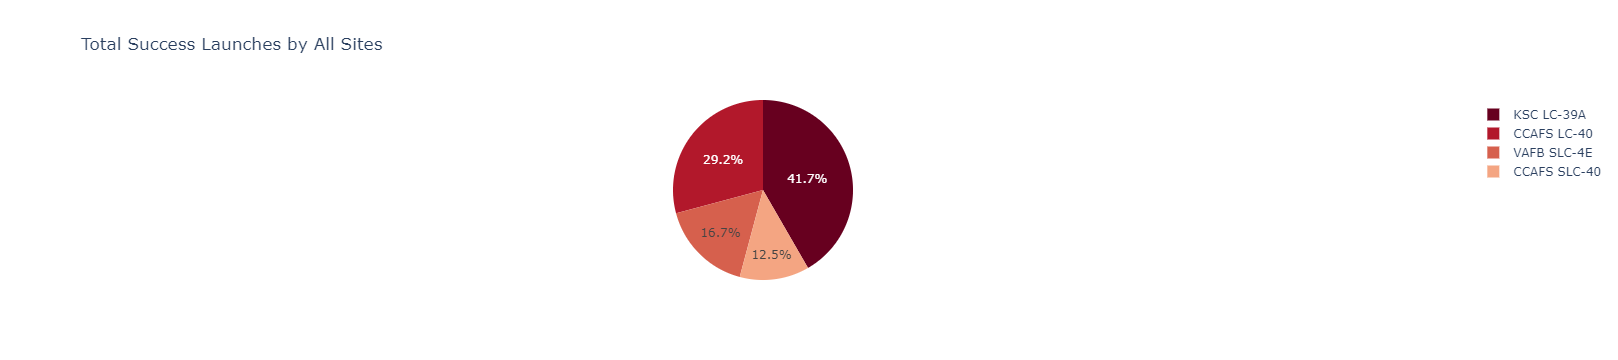

In [24]:
fig = px.pie(all_sites, 
             values='count', 
             names='Launch Site', 
             title='Total Success Launches by All Sites',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Selected site

In [52]:
site = 'VAFB SLC-4E'

In [61]:
selected_site = spacex_df[spacex_df['Launch Site']==site].reset_index(drop=True)
site_sucessRate = selected_site.groupby(['Launch Site', 'class']).size().reset_index()
site_sucessRate.rename(columns={0:'count'}, inplace=True)
site_sucessRate.replace([0,1],['Fail', 'Successs'],inplace=True)
site_sucessRate

,Launch Site,class,count
0,VAFB SLC-4E,Fail,6
1,VAFB SLC-4E,Successs,4


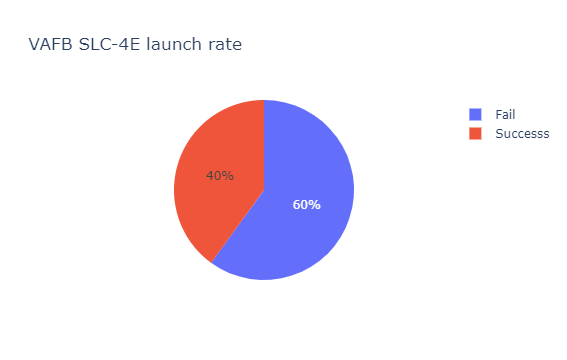

In [62]:
fig = px.pie(
            site_sucessRate, 
            values='count', 
            names='class', 
            title=site +' launch rate',
            )
fig.show()